#Software Coursework



Name: Rosemary Odinakachi Nnamdi

Student ID: S2244511

email: rnnamd300@caledonian.ac.uk

MSc Financial Technology

#Introduction and Problem Statement

The Ames Housing dataset, which considers the features and price points of different properties in Ames, Ohio was the basis for this analysis.

In this analysis, I carried out some steps to bring meaning to the different features in the dataset.
I began by formatting the data, which involved uploading it on Google Colab.
The next steps involved data cleaning, Exploratory Data Analysis, data visualization and splitting trhe dataset into testing and training.

The aim of this analysis is to showcase the relationship that different elements in the dataset has with SalePrice, which is the target variable in this analysis. 




#Data Formatting

There are two methods I could have used to anchor the txt file to my Google Colab.


The first method is to convert the dataset given in the assignment, Ames Housing from the txt file to csv file.

The steps I would take are:



1.   I began by copying the data from my blackboard and pasting it to a new notepad file, then saving the file.
2.   I decided to open an excel file, and upload the notepad file, which is a txt file on the excel file, then I chose the delimited option, and added a header.
3.   After that, I saved it on excel as a csv file.

The second method is to anchor my drive to my google colab and use a code to read the txt file and turn it into a casv file using a delimiter. I used this method in my code below.






#Problem Definition and Introduction

In this analysis, I have decided to create a model that will estimate the sales prices of houses using some elements. The dataset that I will use is the Ames Housing dataset.

**Importing Modules**

Here, I will import the modules that I will use in my analysis.

In [204]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I have decided to mount my drive to my Google colab. This means that I have to upload the file to the Google Colab.

In [205]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I want to read the file and see the first five columns of the dataset.

In [206]:
df = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/AmesHousing.txt', delimiter = "\t")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#Exploratory Data Analysis

I want to view the entire dataset,

In [207]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 81
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


I want to check the descriptive information of the dataset.

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

I want to check the shape of the dataframe.


In [209]:
print("df: " + str(df.shape))

df: (2930, 82)


The result above shows that Ames dataset has 2930 rows and 82 columns.

In [210]:
#I want to check if there is any dupliates in the row.
df_dup = df.copy()

#If there is any duplicates, I want to drop them.

df_dup.drop_duplicates(subset=None, inplace=True)

**Check distribution of target variable: Sales Price**

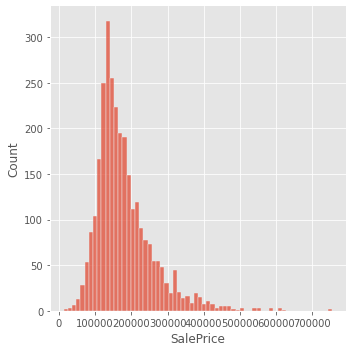

In [211]:
sns.displot(df['SalePrice'])

In [212]:
df['SalePrice'].skew()

1.7435000757376466

From the above, we can see that sale price is right skewed or has positive skewness. This is because it is above 1. I would have corrected it if I was doing regression.

In [213]:
df['SalePrice'].kurt()

5.118899951130896

We can see that the SalesPrice distribution is not a normal curve, and has kurtosis and skewness of more than 1. This means that the distribution is too peaked.

It has a positive excess kurtosis because 5.118899951130896 - 3 = 2.118899951130896. It possesses a leptokurtic distribution.

I want to check the oldest and newest houses

Oldest house built in 1872. Newest house built in 2010.


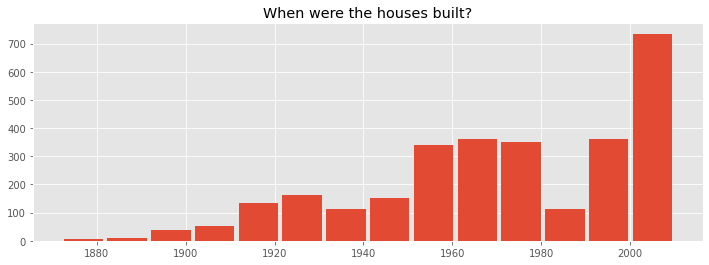

In [214]:
print('Oldest house built in {}. Newest house built in {}.'.format(
    df['Year Built'].min(), df['Year Built'].max()))
df['Year Built'].hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

**Finding Correlation**

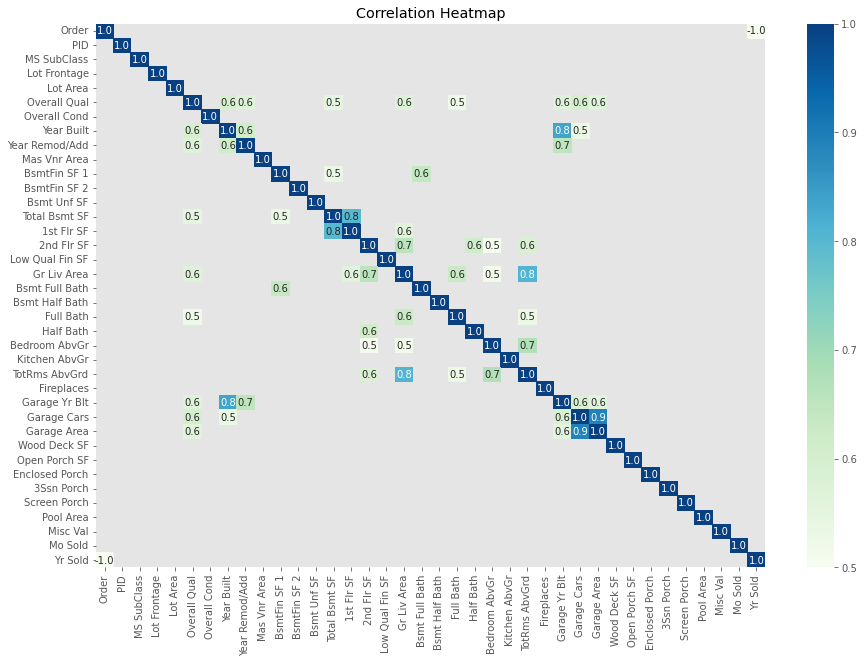

In [215]:
# I want to create a correlation matrix using the dataset that does not include `SalePrice`
corr_mat = df.iloc[:, :-1].corr()

# I want to choose the correlations that are more than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# This gives the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

From the above, I can see that there is multicollinearity between:
- Garage Cars and Garage Area
- Garage Yr Blt and Year Built
- 1st Flr SF and Total Bsmt SF
- Gr Liv Area and TotRms AbvGrd

I will have to drop columns that are lowerly correlated with Sales Price.

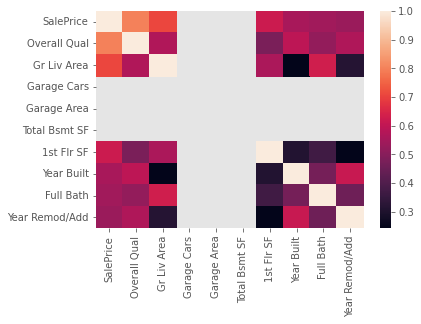

In [216]:
index = df.corr().nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[index].values.T)
sns.heatmap(cm,yticklabels=index.values, xticklabels=index.values)
plt.show()

Drop the columns that have lower correlations.

Garage Area, Year Built, 1st Fir SF, TotRms AbvGrd

In [217]:
df = df.drop(columns=['Garage Area', 'Year Built', '1st Flr SF', 'TotRms AbvGrd'])
df.head(1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,0,0,1656,1.0,0.0,1,0,3,1,TA,Typ,2,Gd,Attchd,1960.0,Fin,2.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


I want to check the count of every type of garage.

In [218]:
print(df['Garage Type'].value_counts(dropna=False))

Attchd     1731
Detchd      782
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64


I want a description of the garage column.

In [219]:
df['Garage Type'].describe()

count       2773
unique         6
top       Attchd
freq        1731
Name: Garage Type, dtype: object

I want to find the number of houses in the neighborhood.

In [220]:
print(df['Neighborhood'].value_counts(dropna=False))

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64


I can see that NAmes or North Ames is the most populous neighborhood.

I want to find out the top ten houses that have the biggest lot sizes.

In [221]:
df.sort_values(by=['Lot Area'], ascending=False, axis=0,inplace=True)
df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
956,957,916176125,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236.0,Rec,820.0,80.0,2136.0,GasW,TA,Y,SBrkr,0,0,2036,2.0,0.0,2,0,3,1,TA,Typ,2,Gd,Attchd,1965.0,RFn,2.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
1570,1571,916125425,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249.0,BLQ,147.0,103.0,1499.0,GasA,Ex,Y,SBrkr,167,0,1786,2.0,0.0,2,0,3,1,TA,Typ,2,Gd,Attchd,1965.0,Fin,2.0,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
2115,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,700,0,2144,0.0,1.0,2,0,4,1,Gd,Typ,2,TA,Attchd,1958.0,Fin,2.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
2071,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,0,0,1824,1.0,0.0,2,0,2,1,Gd,Typ,2,TA,Attchd,1971.0,Unf,2.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
2766,2767,906475200,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.0,Unf,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,0,0,1533,1.0,0.0,2,0,2,1,Gd,Typ,2,TA,Attchd,1975.0,Unf,2.0,TA,TA,Y,200,54,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,950,0,5642,2.0,0.0,2,1,3,1,Ex,Typ,3,Gd,Attchd,2008.0,Fin,2.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
314,315,916125360,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,5,5,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,353.0,Rec,334.0,60.0,747.0,GasA,TA,Y,SBrkr,0,0,1687,1.0,0.0,1,0,3,1,TA,Min1,2,TA,Detchd,1966.0,Unf,2.0,TA,TA,N,0,0,50,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000
1610,1611,1007100110,70,I (all),NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,686,0,1836,0.0,0.0,2,0,4,1,TA,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,103000
15,16,527216070,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,SBrkr,1589,0,3279,1.0,0.0,3,1,4,1,Ex,Mod,1,Gd,BuiltIn,2003.0,Fin,3.0,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
1402,1403,90540106

I want to find the house with the best rated quality


In [222]:
df.sort_values(by=['Overall Qual'], ascending=False, axis=0,inplace=True)
df.head(1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1642,1643,527256040,20,RL,81.0,13870,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,PosA,PosA,1Fam,1Story,10,5,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,250.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1152.0,Unf,0.0,590.0,1742.0,GasA,Ex,Y,SBrkr,0,0,2042,1.0,0.0,2,0,3,1,Ex,Typ,1,Gd,Attchd,2007.0,Fin,3.0,TA,TA,Y,240,52,0,0,174,0,NaN,NaN,NaN,0,10,2007,New,Partial,455000


The house with the best rated quality has a saleprice of 13,226,725

I want to see other features of the house with the best quality.

In [223]:
best_rated_house = df.head(1)
best_rated_house['Street']

1642    Pave
Name: Street, dtype: object

In [224]:
best_rated_house['Neighborhood']

1642    StoneBr
Name: Neighborhood, dtype: object

In [225]:
best_rated_house['House Style']

1642    1Story
Name: House Style, dtype: object

In [226]:
best_rated_house['Exter Qual']

1642    Ex
Name: Exter Qual, dtype: object

**Display the most expensive house**

In [227]:
df.sort_values(by=['SalePrice'], ascending=False, axis=0,inplace=True)
df.head(1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1767,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,1872,0,4316,0.0,1.0,3,1,4,1,Ex,Typ,2,Ex,Attchd,1994.0,Fin,3.0,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [228]:
most_expensive_house = df.head(1)
most_expensive_house['Neighborhood']

1767    NoRidge
Name: Neighborhood, dtype: object

The expensive house has a value of 13,534,474 and is based in NorthRidge.

I want to display the categorical and numerical features.

In [229]:
#This displays the categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print('Categorical')
print(categorical_features)

#This displays the numerical features
numerical_features = df.select_dtypes(exclude = ["object"]).columns
print('Numerical')
print(numerical_features)

#I want to assign the numerical features to a new name.
df_num=df[numerical_features]
df_cat=df[categorical_features]

Categorical
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')
Numerical
Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsm

**Relationship that exists between Sales Price and discrete functions**

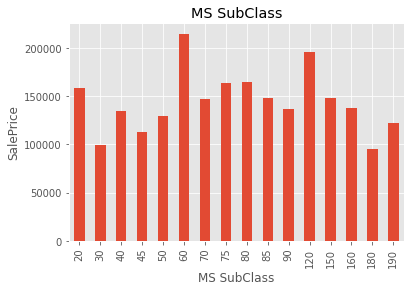

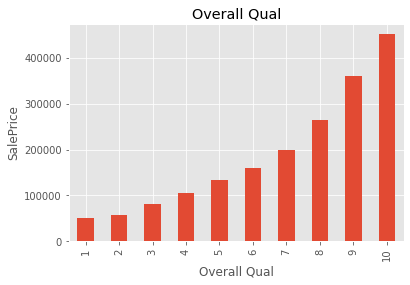

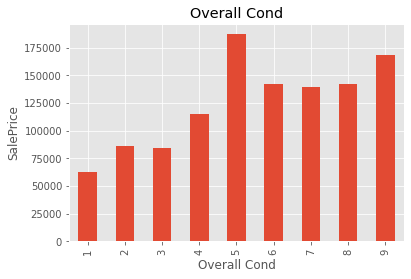

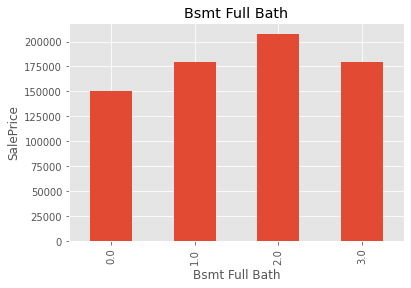

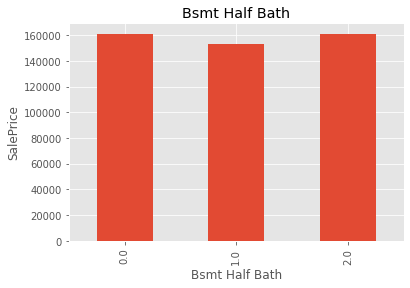

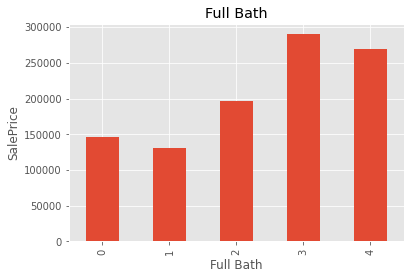

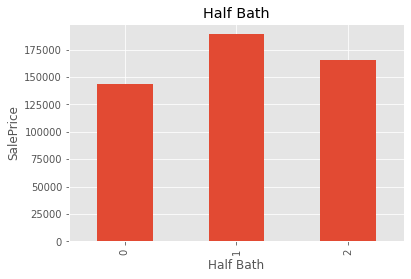

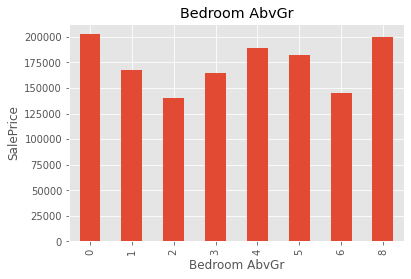

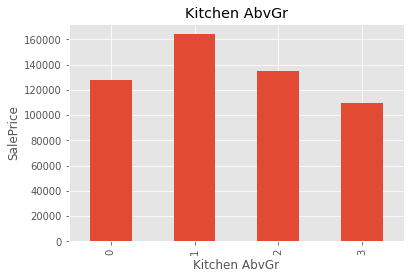

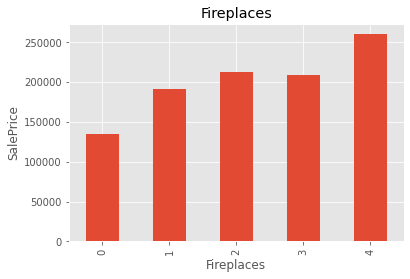

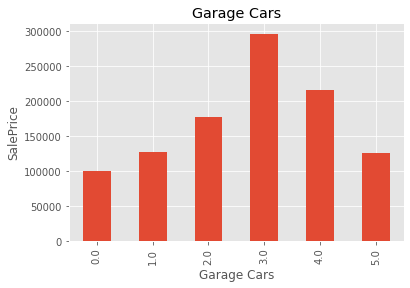

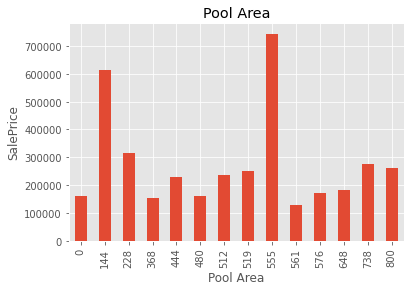

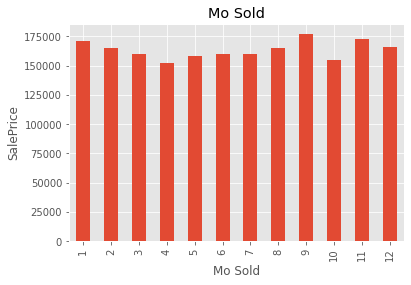

In [230]:
year_feature = [feature for feature in df_num if 'Yr' in feature or 'Year' in feature]
discrete_feature=[feature for feature in df_num if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**Relationship that exists between continuous variable** 

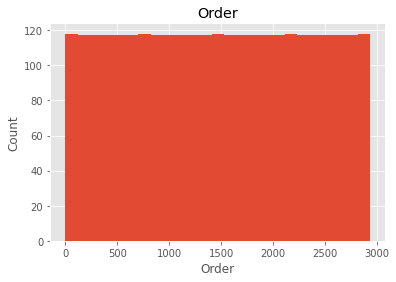

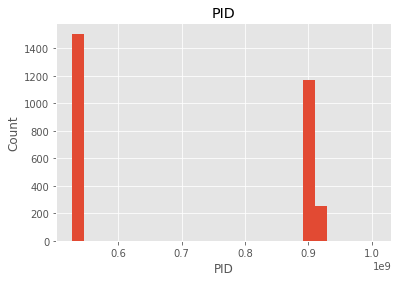

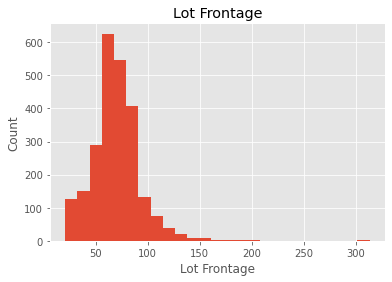

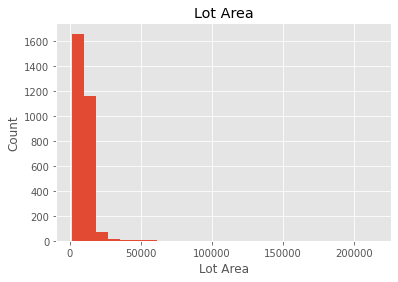

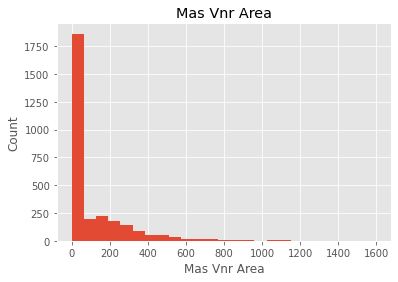

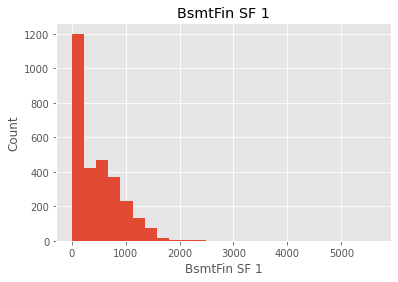

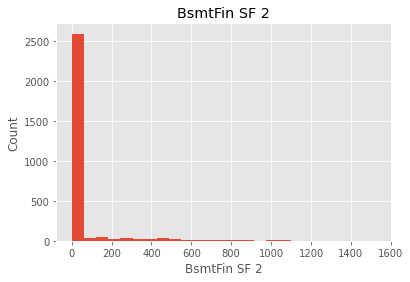

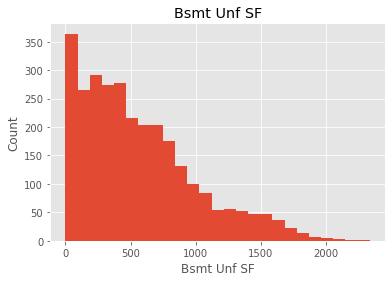

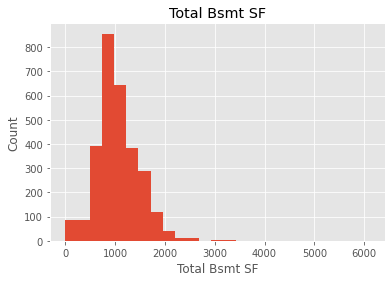

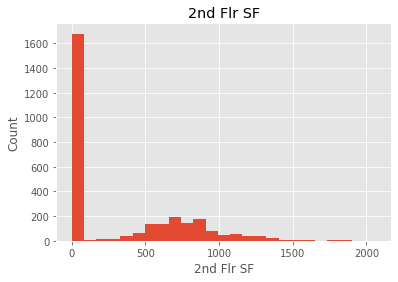

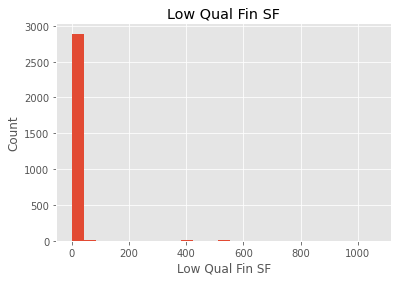

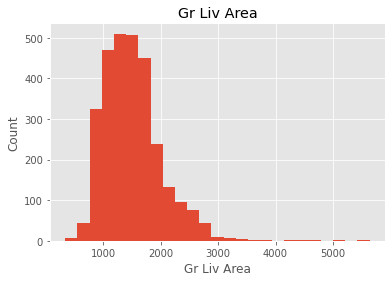

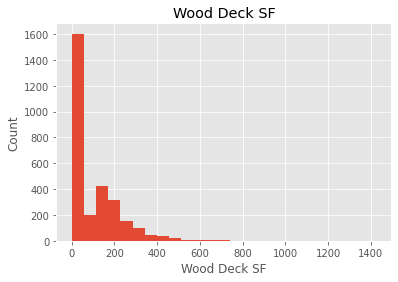

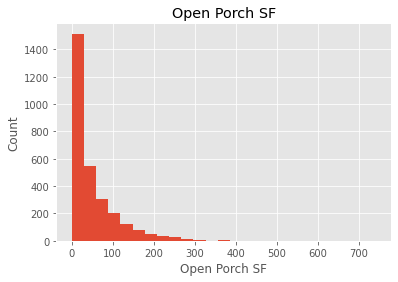

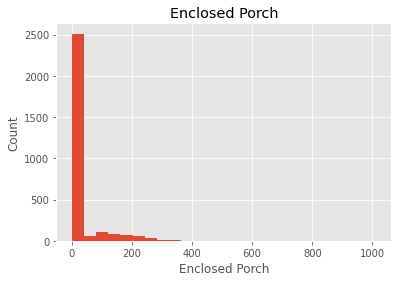

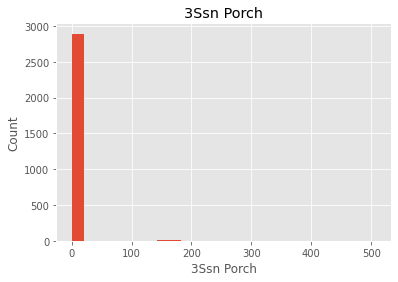

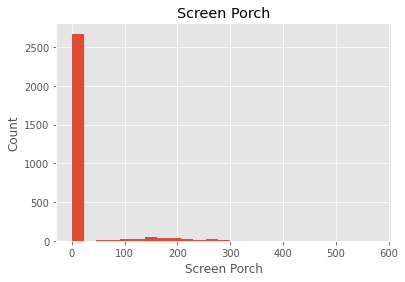

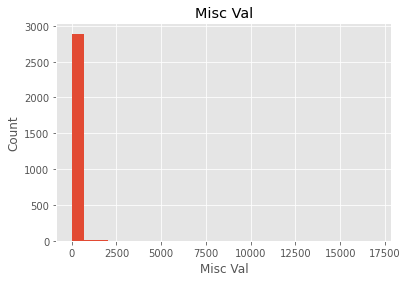

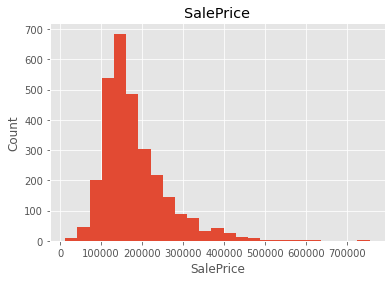

In [231]:
continuous_feature=[feature for feature in df_num if feature not in discrete_feature+year_feature+['Id']]
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#Data Preparation

**Target Data**

Sales Price


**Categorical Data**


**Numerical Data**




**Convert Continuous Variable to Numeric**

In [232]:
numeric_columns = ['Lot Frontage', 'Lot Area', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1767,1768,528351010,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,1872,0,4316,0.0,1.0,3,1,4,1,Ex,Typ,2,Ex,Attchd,1994.0,Fin,3.0,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1760,1761,528320050,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096.0,Unf,0.0,300.0,2396.0,GasA,Ex,Y,SBrkr,2065,0,4476,1.0,0.0,3,1,4,1,Ex,Typ,2,TA,Attchd,1996.0,Fin,3.0,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
2445,2446,528320060,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1796,0,3627,1.0,0.0,3,1,4,1,Gd,Typ,1,TA,Attchd,1995.0,Fin,3.0,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1063,1064,528164060,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,0,0,2470,2.0,0.0,1,1,1,1,Ex,Typ,2,Gd,Attchd,2003.0,Fin,3.0,TA,TA,Y,154,65,0,0,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
44,45,528150070,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,0,0,2364,1.0,0.0,2,1,2,1,Ex,Typ,2,Gd,Attchd,2009.0,Fin,3.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


**3.1 Remove Unnecessary Columns**

I have decided to drop the ID column because it is not necessary to my analysis. 

In [233]:
df = df.drop(columns=['PID', 'Order', 'Garage Yr Blt'])
df.head(1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1767,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,SBrkr,1872,0,4316,0.0,1.0,3,1,4,1,Ex,Typ,2,Ex,Attchd,Fin,3.0,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


**Outliers**

I want to drop the houses with more than 4000 square feet from the data set as stated in the documentation.

In [234]:
df.drop(df[df['Gr Liv Area'] > 4000]. index, inplace=True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 2445 to 181
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2435 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Neighborhood     2925 non-null   object 
 12  Condition 1      2925 non-null   object 
 13  Condition 2      2925 non-null   object 
 14  Bldg Type        2925 non-null   object 
 15  House Style      2925 non-null   object 
 16  Overall Qual     2925 non-null   int64  
 17  Overall Cond

I want to drop sales that are abnormal and family sales as stated in the documentation. 

In [236]:
df = df[df["Sale Condition"].str.contains("Abnormal") == False]

In [237]:
df = df[df["Sale Condition"].str.contains("Family") == False]

In [238]:
df.head(50)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2445,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1796,0,3627,1.0,0.0,3,1,4,1,Gd,Typ,1,TA,Attchd,Fin,3.0,TA,TA,Y,361,76,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1063,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,0,0,2470,2.0,0.0,1,1,1,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,154,65,0,0,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal,615000
44,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,0,0,2364,1.0,0.0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,0,67,0,0,0,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
432,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288.0,Unf,0.0,342.0,2630.0,GasA,Ex,Y,SBrkr,0,0,2674,2.0,0.0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,360,50,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,610000
1637,20,RL,52.0,51974,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,0,0,2338,1.0,0.0,2,1,4,1,Gd,Typ,2,Gd,Attchd,Fin,3.0,Gd,TA,Y,0,135,0,0,322,0,NaN,NaN,NaN,0,6,2007,New,Partial,591587
2450,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1567,0,3500,1.0,0.0,3,1,4,1,Ex,Typ,1,TA,Attchd,RFn,3.0,TA,TA,Y,870,86,0,0,210,0,NaN,NaN,NaN,0,5,2006,WD,Normal,584500
433,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1734.0,1734.0,GasA,Ex,Y,SBrkr,1088,0,2822,0.0,0.0,3,1,4,1,Ex,Typ,1,Gd,BuiltIn,RFn,3.0,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
2332,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240.0,Unf,0.0,1752.0,1992.0,GasA,Ex,Y,SBrkr,876,0,2868,0.0,0.0,3,1,4,1,Ex,Typ,1,Gd,BuiltIn,Fin,3.0,TA,TA,Y,214,108,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
423,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,Ex,Y,SBrkr,0,0,2402,1.0,0.0,2,0,2,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
456,20,RL,100.0,14836,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2005,Hip,CompShg,CemntBd,CmentBd,Stone,730.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2146.0,Unf,0.0,346.0,2492.0,GasA,Ex,Y,SBrkr,0,0,2492

I want to drop the following columns because they are sparsely populated: Alley, Pool Qc and Misc Feature.

In [239]:
df = df.drop(columns=['Alley', 'Pool QC', 'Misc Feature'])
df.head(1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2445,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1796,0,3627,1.0,0.0,3,1,4,1,Gd,Typ,1,TA,Attchd,Fin,3.0,TA,TA,Y,361,76,0,0,0,0,NaN,0,7,2006,WD,Normal,625000


**3.2 Handle Missing or Null Values**

I want to check which fields have null or missing values.



In [240]:
df[df['Fence'].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2445,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1796,0,3627,1.0,0.0,3,1,4,1,Gd,Typ,1,TA,Attchd,Fin,3.0,TA,TA,Y,361,76,0,0,0,0,NaN,0,7,2006,WD,Normal,625000
1063,20,RL,106.0,12720,Pave,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,0,0,2470,2.0,0.0,1,1,1,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,154,65,0,0,216,144,NaN,0,2,2008,WD,Normal,615000
44,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,0,0,2364,1.0,0.0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,0,67,0,0,0,0,NaN,0,3,2010,New,Partial,611657
432,20,RL,105.0,13693,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288.0,Unf,0.0,342.0,2630.0,GasA,Ex,Y,SBrkr,0,0,2674,2.0,0.0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,360,50,0,0,0,0,NaN,0,3,2009,WD,Normal,610000
1637,20,RL,52.0,51974,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,0,0,2338,1.0,0.0,2,1,4,1,Gd,Typ,2,Gd,Attchd,Fin,3.0,Gd,TA,Y,0,135,0,0,322,0,NaN,0,6,2007,New,Partial,591587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,20,RL,50.0,5000,Pave,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,Norm,1Fam,1Story,1,3,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,Fa,Fa,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,FuseF,0,0,334,0.0,0.0,1,0,1,1,Fa,Typ,0,NaN,NaN,NaN,0.0,NaN,NaN,N,0,0,0,0,0,0,NaN,0,1,2007,WD,Normal,39300
2880,20,C (all),50.0,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50.0,Unf,0.0,430.0,480.0,GasA,TA,N,FuseA,0,0,480,1.0,0.0,0,0,1,1,TA,Typ,0,NaN,Detchd,Unf,1.0,TA,TA,Y,0,0,0,0,0,0,NaN,0,10,2006,WD,Abnorml,35311
2843,30,RL,60.0,8088,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,2,3,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,498.0,498.0,GasA,TA,N,FuseF,0,0,498,0.0,0.0,1,0,1,1,TA,Typ,0,NaN,Detchd,Unf,1.0,Fa,Fa,N,0,0,100,0,0,0,NaN,0,2,2006,ConLD,Normal,35000
1553,20,A (agr),80.0,14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,0,0,733,0.0,0.0,1,0,2,1,Fa,Sal,0,NaN,Attchd,Unf,2.0,Fa,Po,N,0,0,0,0,0,0,NaN,0,2,2008,WD,Abnorml,13100


In [241]:
missing_data_count = df.isnull().sum()
missing_data_percent = df.isnull().sum() / len(df) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

There are 22 features having missing data.

Top 10 missing value features:


,Count,Percent
Fence,2319,80.548802
Fireplace Qu,1398,48.558527
Lot Frontage,484,16.811393
Garage Finish,158,5.488017
Garage Cond,158,5.488017
Garage Qual,158,5.488017
Garage Type,156,5.418548
Bsmt Exposure,83,2.882945
BsmtFin Type 2,81,2.813477
Bsmt Qual,80,2.778743


I have decided to print out the entire twenty seven columns with the null or misisng values.

In [242]:
missing_data.head(27)

,Count,Percent
Fence,2319,80.548802
Fireplace Qu,1398,48.558527
Lot Frontage,484,16.811393
Garage Finish,158,5.488017
Garage Cond,158,5.488017
Garage Qual,158,5.488017
Garage Type,156,5.418548
Bsmt Exposure,83,2.882945
BsmtFin Type 2,81,2.813477
Bsmt Qual,80,2.778743


Based on the above, I have decided to group the columns with missing values into three.

In the first group, I will replace NAN with None. It is filled with the categorical variables: Fence, Fireplace Qu, Garage Type, Garage Finish, Garage Qual, Garage Cond, Bsmt Qual, Bmst Cond, Bmst Exposure, BmstFin Type1, BmstFin Type2, and Mas vnr Type.

In the second group, we will replace the NAN with 0. It is filled with the numerical variables: Garage Cars, BmstFin sF1, BmstFin Sf2, BsmtUnf sF, TotalBsmt SF, BmstFull Bath, BsmtHalf Bath, and Mas Vnr Area.

In the third group, I will use modes to replace the following: Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities.
As for the LotFrontage, I will replace it with mean.
As for the GarageYrBlt, I will replace it with YearBuilt.


In [243]:
from sklearn.impute import SimpleImputer
# Group 1:
group_1 = [
    'Fence', 'Fireplace Qu', 'Garage Type',
    'Garage Finish', 'Garage Qual', 'Garage Cond', 'Bsmt Qual', 'Bsmt Cond',
    'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Mas Vnr Type'
]
df[group_1] = df[group_1].fillna("None")

In [244]:
# Group 2:
group_2 = [
    'Garage Cars', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area'
]

df[group_2] = df[group_2].fillna(0)

In [245]:
# Group 3:
group_3a = [
    'Functional', 'MS Zoning', 'Electrical', 'Kitchen Qual', 'Exterior 1st',
    'Exterior 2nd', 'Sale Type', 'Utilities'
]

imputer = SimpleImputer(strategy='most_frequent')
df[group_3a] = pd.DataFrame(imputer.fit_transform(df[group_3a]), index=df.index)

df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())


In [246]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2445,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,SBrkr,1796,0,3627,1.0,0.0,3,1,4,1,Gd,Typ,1,TA,Attchd,Fin,3.0,TA,TA,Y,361,76,0,0,0,0,None,0,7,2006,WD,Normal,625000
1063,20,RL,106.0,12720,Pave,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,0,0,2470,2.0,0.0,1,1,1,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,154,65,0,0,216,144,None,0,2,2008,WD,Normal,615000
44,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,SBrkr,0,0,2364,1.0,0.0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,0,67,0,0,0,0,None,0,3,2010,New,Partial,611657
432,20,RL,105.0,13693,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288.0,Unf,0.0,342.0,2630.0,GasA,Ex,Y,SBrkr,0,0,2674,2.0,0.0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3.0,TA,TA,Y,360,50,0,0,0,0,None,0,3,2009,WD,Normal,610000
1637,20,RL,52.0,51974,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,PosN,Norm,1Fam,1Story,9,5,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1101.0,Unf,0.0,1559.0,2660.0,GasA,Ex,Y,SBrkr,0,0,2338,1.0,0.0,2,1,4,1,Gd,Typ,2,Gd,Attchd,Fin,3.0,Gd,TA,Y,0,135,0,0,322,0,None,0,6,2007,New,Partial,591587


In [247]:
#I want to check if there is any NAN
df[df['Fence'].isna()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


I want to transform some numerical variables to categorical variables such as Mo Sold, Yr Sold, Overall Cond, MS SubClass

In [248]:

df['MS SubClass'] = df['MS SubClass'].apply(str)



df['Overall Cond'] = df['Overall Cond'].astype(str)


df['Yr Sold'] = df['Yr Sold'].astype(str)
df['Mo Sold'] = df['Mo Sold'].astype(str)

**Encode the data**

In [249]:
from sklearn.preprocessing import LabelEncoder

# I want to encode the ordinal categorical columns
label_encoding_cols = [
    "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2",
    "Bsmt Qual", "Central Air", "Exter Cond", "Exter Qual", "Fireplace Qu", "Functional",
    "Garage Cond", "Garage Qual", "Heating QC", "Kitchen Qual", "Land Slope",
    "Lot Shape", "Mo Sold", "MS SubClass", "Overall Cond", "Paved Drive", "Street", "Utilities", "Yr Sold"
]

# I want to use the Label Encoder
label_encoder = LabelEncoder()

for col in label_encoding_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [250]:
df.head(15)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2445,10,RL,118.0,35760,1,0,Lvl,0,CulDSac,0,NoRidge,Norm,Norm,1Fam,2Story,10,4,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,2,2,PConc,0,5,1,2,1387.0,6,0.0,543.0,1930.0,GasA,0,1,SBrkr,1796,0,3627,1.0,0.0,3,1,4,1,2,7,1,5,Attchd,Fin,3.0,5,5,2,361,76,0,0,0,0,None,0,9,0,WD,Normal,625000
1063,5,RL,106.0,12720,1,3,HLS,0,Inside,1,NridgHt,Norm,Norm,1Fam,1Story,10,4,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,0,4,PConc,0,5,1,2,2257.0,6,0.0,278.0,2535.0,GasA,0,1,SBrkr,0,0,2470,2.0,0.0,1,1,1,1,0,7,2,2,Attchd,Fin,3.0,5,5,2,154,65,0,0,216,144,None,0,4,2,WD,Normal,615000
44,5,RL,100.0,12919,1,0,Lvl,0,Inside,0,NridgHt,Norm,Norm,1Fam,1Story,9,4,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,0,4,PConc,0,5,1,2,2188.0,6,0.0,142.0,2330.0,GasA,0,1,SBrkr,0,0,2364,1.0,0.0,2,1,2,1,0,7,2,2,Attchd,Fin,3.0,5,5,2,0,67,0,0,0,0,None,0,5,4,New,Partial,611657
432,5,RL,105.0,13693,1,3,Lvl,0,Inside,0,NridgHt,PosA,PosA,1Fam,1Story,10,4,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472.0,0,4,PConc,0,5,1,2,2288.0,6,0.0,342.0,2630.0,GasA,0,1,SBrkr,0,0,2674,2.0,0.0,2,1,2,1,0,7,2,2,Attchd,Fin,3.0,5,5,2,360,50,0,0,0,0,None,0,5,3,WD,Normal,610000
1637,5,RL,52.0,51974,1,0,Lvl,0,CulDSac,0,StoneBr,PosN,Norm,1Fam,1Story,9,4,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,710.0,0,4,PConc,0,5,0,2,1101.0,6,0.0,1559.0,2660.0,GasA,0,1,SBrkr,0,0,2338,1.0,0.0,2,1,4,1,2,7,2,2,Attchd,Fin,3.0,2,5,2,0,135,0,0,322,0,None,0,8,1,New,Partial,591587
2450,10,RL,114.0,17242,1,0,Lvl,0,Inside,0,NoRidge,Norm,Norm,1Fam,2Story,9,4,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,2,2,PConc,0,5,1,5,292.0,2,1393.0,48.0,1733.0,GasA,0,1,SBrkr,1567,0,3500,1.0,0.0,3,1,4,1,0,7,1,5,Attchd,RFn,3.0,5,5,2,870,86,0,0,210,0,None,0,7,0,WD,Normal,584500
433,10,RL,107.0,13891,1,3,Lvl,0,Inside,0,NridgHt,Norm,Norm,1Fam,2Story,9,4,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,0,4,PConc,0,5,1,6,0.0,6,0.0,1734.0,1734.0,GasA,0,1,SBrkr,1088,0,2822,0.0,0.0,3,1,4,1,0,7,1,2,BuiltIn,RFn,3.0,5,5,2,52,170,0,0,192,0,None,0,0,3,New,Partial,582933
2332,10,RL,85.0,16056,1,0,Lvl,0,Inside,0,StoneBr,Norm,Norm,1Fam,2Story,9,4,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,2,4,PConc,0,5,0,2,240.0,6,0.0,1752.0,1992.0,GasA,0,1,SBrkr,876,0,2868,0.0,0.0,3,1,4,1,0,7,1,2,BuiltIn,Fin,3.0,5,5,2,214,108,0,0,0,0,None,0,9,0,New,Partial,556581
423,5,RL,105.0,15431,1,3,Lvl,0,Inside,0,NridgHt,Norm,Norm,1Fam,1Story,10,4,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,0,4,PConc,0,5,1,2,1767.0,0,539.0,788.0,3094.0,GasA,0,1,SBrkr,0,0,2402,1.0,0.0,2,0,2,1,0,7,2,2,Attchd,Fin,3.0,5,5,2,0,72,0,0,170,0,None,0,6,3,WD,Normal,555000
456,5,RL,100.0,14836,1,0,HLS,0,Inside,1,NridgHt,Norm,Norm,1Fam,1Story,10,4,2005,Hip,CompShg,CemntBd,CmentBd,Stone,730.0,0,4,PConc,0,5,1,2,2146.0,6,0.0,346.0,2492.0,GasA,0,1,SBrkr,0,0,2492,1.0,0.0,2,1,2,1,0,7,1,0,Attchd,Fin,3.0,5,5,2,226,235,0,0,0,0,None,0,4,3,WD,Abnorml,552000


#Data Visualization

In [251]:
#Importation of necessary visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

**Bar Chart**

I want to show the different types of streets and visualize it using a bar plot.

In [252]:
street_group = df.value_counts(df.Street)
street_group

Street
1    2867
0      12
dtype: int64

Pave is 1. Gravel is 0.

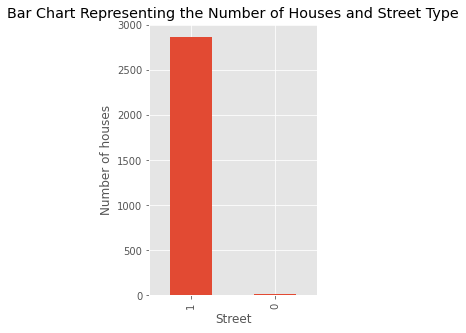

In [253]:
street_group.plot(kind='bar', figsize=(3,5))
plt.ylabel('Number of houses')
plt.title('Bar Chart Representing the Number of Houses and Street Type')

plt.show()

I want to show the different neighbprhoods and houses in them.

In [254]:
neighborhood_group = df.value_counts(df.Neighborhood)
neighborhood_group

Neighborhood
NAmes      435
CollgCr    265
OldTown    234
Edwards    187
Somerst    180
NridgHt    165
Gilbert    160
Sawyer     149
NWAmes     127
SawyerW    124
Mitchel    112
BrkSide    106
Crawfor    100
IDOTRR      90
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      29
Blmngtn     28
NPkVill     23
Veenker     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
dtype: int64

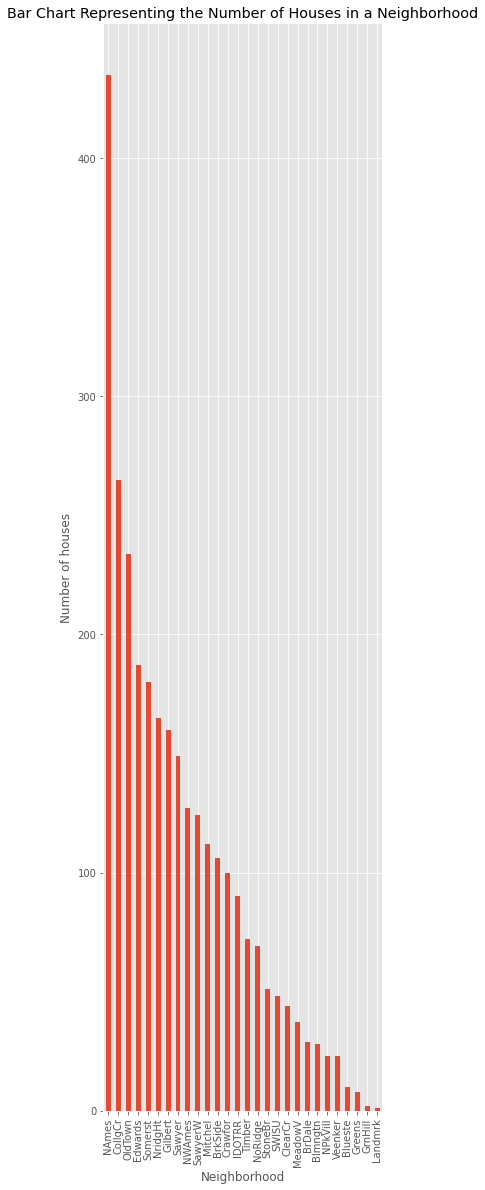

In [255]:
neighborhood_group.plot(kind='bar', figsize=(5,20))


plt.ylabel('Number of houses')
plt.title('Bar Chart Representing the Number of Houses in a Neighborhood')



plt.show()

We can see from above that NAmes or North Ames have higher number of houses.

In [256]:
garage_group = df.value_counts(df['Garage Type'])
garage_group

Garage Type
Attchd     1702
Detchd      769
BuiltIn     179
None        156
Basment      36
2Types       22
CarPort      15
dtype: int64

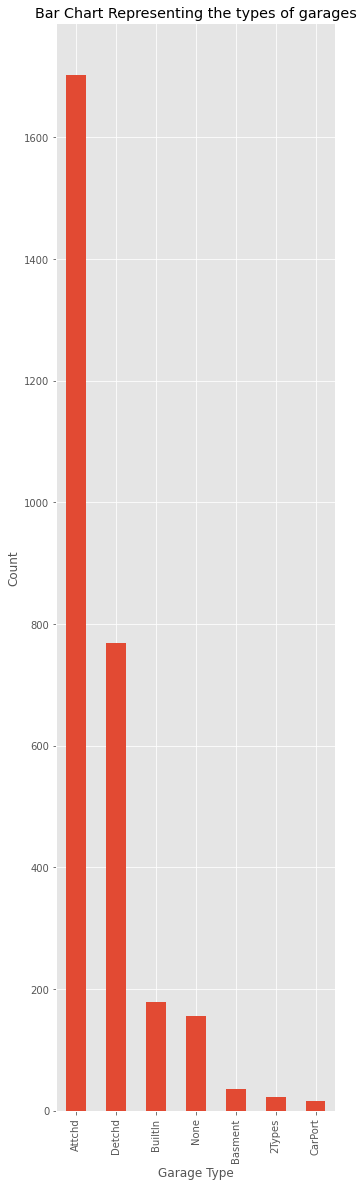

In [257]:
garage_group.plot(kind='bar', figsize=(5,20))


plt.ylabel('Count')
plt.title('Bar Chart Representing the types of garages')



plt.show()

Houses with attached garages are more than others.

***Boxplot***

I want to do a boxplot of saleprice against other elements.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/dabl/plot/supervised.py:610: FutureWarning:

The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.



Target looks like regression


/usr/local/lib/python3.8/dist-packages/dabl/plot/supervised.py:111: UserWarning:

Showing only top 10 continuous features.



Showing only top 10 of 38 categorical features


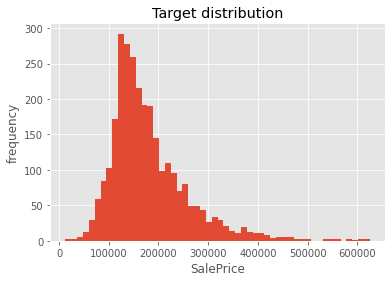

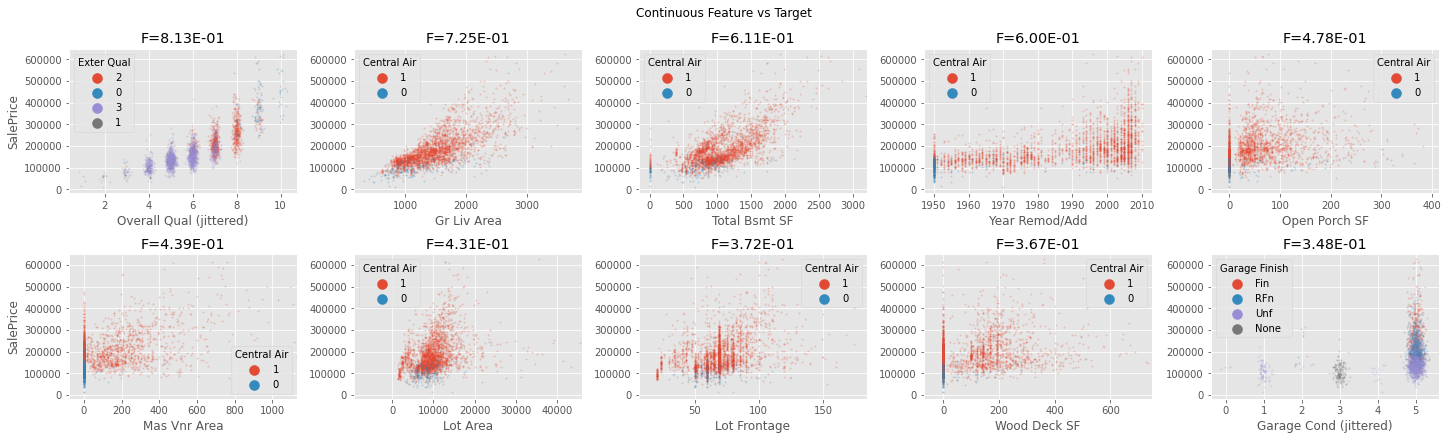

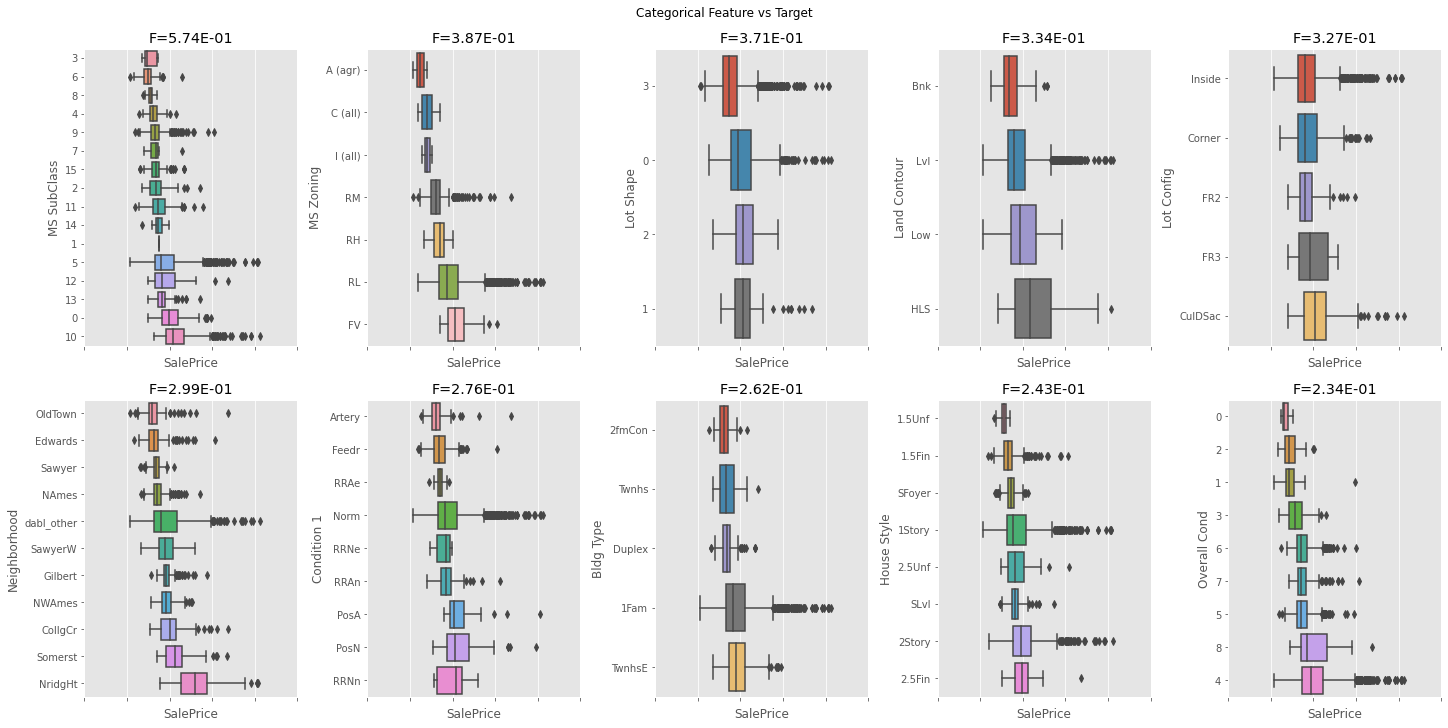

In [258]:
!pip install dabl
from dabl import plot

import matplotlib.pyplot as plt


plot(df, 'SalePrice')
plt.show()

From the boxplot, we can see some outliers that exist on the higher end of the scale for Land Contour, Lot Config.

The others have outliers on both sides.

Using MS Zoning to buttress the result above, we can see that those properties that were erected in the FV area or Floating Village Residential (per documentation) has a median value of more than $200,000. This may be because this locality has a great environment based on its name. The parts of the MS Zoning have lower median values.


Based on the boxplot for Neighborhood, we can see that NridgHT has the highest median value of above $200,000 compared to other neighborhoods.


**Scatter Plot**

I have decided to use scatter plot to check the relationship between SalePrice and some variables that affect it

I chose Gr Liv Area because it allows us to see the size of the properties and how they relate to price.



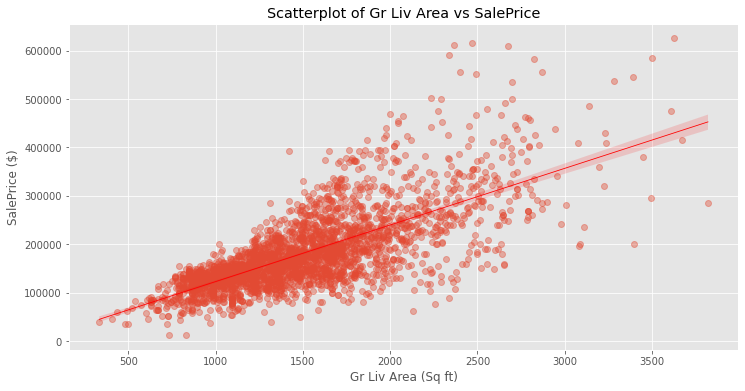

In [259]:


plt.figure(figsize=(12,6))
g = sns.regplot(data=df, x='Gr Liv Area', y='SalePrice', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.xlabel(xlabel='Gr Liv Area (Sq ft)')
plt.ylabel(ylabel='SalePrice ($)')
plt.title(label='Scatterplot of Gr Liv Area vs SalePrice')
plt.show()


From the above, we can see that they have positive correlation. This means that as sale price increases, the size of the properties also increases. Based on the scatter plot, I can see that a great deal of the sale prices exist between 70,000 to $300,000, while the houses occur between 750 to 2500 square feet. 

In [260]:
def subplot_scatterplots_against_saleprice(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3))
    ncols = 3
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 3*nrows))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.regplot(x=dataframe.loc[:,column], y=dataframe.loc[:,'SalePrice'], 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8}, ax=ax[i])
        ax[i].set_xlabel(xlabel=column)
        ax[i].set_ylabel(ylabel='SalePrice ($)')
        ax[i].set_title(label='Scatterplot of {} vs SalePrice'.format(column), size=8)
    if len(list_of_columns) < nrows*ncols:
        for i in range(nrows*ncols - len(list_of_columns)):
            ax[nrows*ncols - 1 - i].set_axis_off()
    fig.tight_layout()

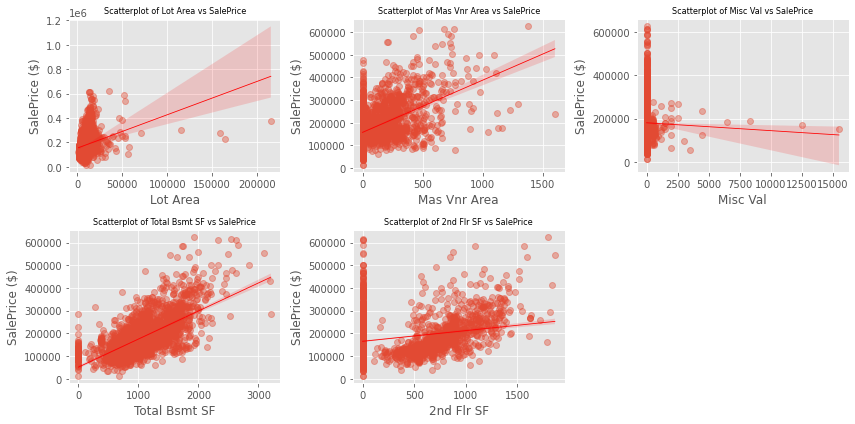

In [261]:
subplot_scatterplots_against_saleprice(
    df, 
    ['Lot Area','Mas Vnr Area','Misc Val','Total Bsmt SF','2nd Flr SF'])


The continous variables above similarities to the behavior of Gr Liv Area. They are highly correlated with Sale Price.

**Histogram Visualization**

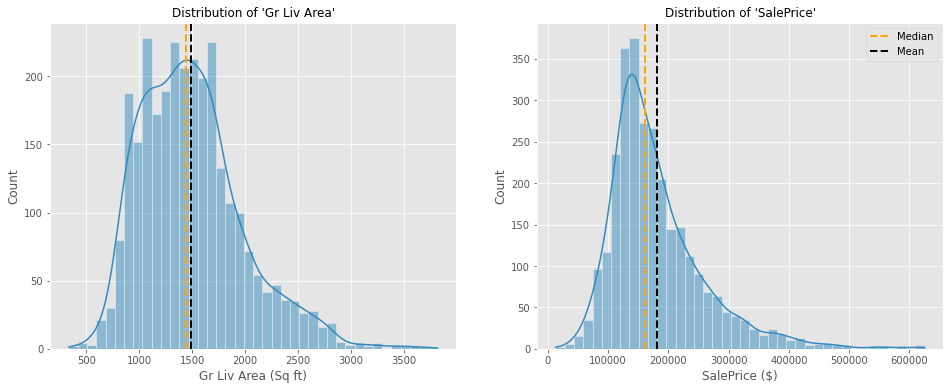

In [262]:
fig, ax = plt.subplots(figsize=(16,6), ncols=2)
sns.histplot(data=df, x='Gr Liv Area',bins=40, kde=True, ax=ax[0])
ax[0].axvline(df.loc[:,'Gr Liv Area'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
ax[0].axvline(df.loc[:,'Gr Liv Area'].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
ax[0].set_title('Distribution of \'Gr Liv Area\'', fontsize=12)
ax[0].set_xlabel('Gr Liv Area (Sq ft)')

sns.histplot(data=df, x='SalePrice',bins=40, kde=True, ax=ax[1])
ax[1].axvline(df.loc[:,'SalePrice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
ax[1].axvline(df.loc[:,'SalePrice'].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
ax[1].set_title('Distribution of \'SalePrice\'', fontsize=12)
ax[1].set_xlabel('SalePrice ($)')
plt.legend()
plt.show()

From the above, we can see that the distribution is right skewed for both Gr Liv Area and Sale Price. Mean is black and it is residing at the right of the median, which is orange. This means that it is a positiely skewed distribution, anmd not assymetric.

The mean is closer to the tail in a right skewed distribution.

**Average Sale Price in different neighborhoods**

I want to visualize average sale price in different neighborhoods.

In [263]:
import plotly
import plotly.graph_objs as go

In [264]:
dy=pd.DataFrame(df.groupby('Neighborhood')['SalePrice'].mean().reset_index().values,
                    columns=["Neighborhood","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice over the Neighborhood",'xaxis':{'title':"Neighborhood"}
                        ,'yaxis':{'title':"Average SalePrice"},'xaxis_tickangle':-45})
# Add traces
fig.add_trace(go.Scatter(x=dy.Neighborhood, y=dy.SalePrice,mode='lines+markers'))
fig.show()

We can see that NridgHt has higher average sale price compared to other neighborhoods.

**Average Saleprice based on House Style.**

In [265]:
dy=pd.DataFrame(df.groupby('House Style')['SalePrice'].mean().reset_index().values,
                    columns=["House Style","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice based on House Style",'xaxis':{'title':"House Style"}
                        ,'yaxis':{'title':"Average SalePrice"}})

# Add traces
fig.add_trace(go.Bar(x=dy['House Style'], y=dy.SalePrice,marker=dict(color="green")))
fig.show()

From the above, we can see that 2.5Fin or Two and one-half story: 2nd level Finished buildings have higher average sale price compared to others.

#Modelling

**Data Segregation**

I am dividing the dataset into two, which are test and train, in the ratio of 80:20.

In [266]:
# I have split the dataset into 80% train and 20% test.
train_df = df[:int(0.8*df.shape[0])]
test_df = df[int(0.8*df.shape[0]):]

print(train_df.head(10))
print(test_df.head(10))

      MS SubClass MS Zoning  Lot Frontage  Lot Area  Street  Lot Shape  \
2445           10        RL         118.0     35760       1          0   
1063            5        RL         106.0     12720       1          3   
44              5        RL         100.0     12919       1          0   
432             5        RL         105.0     13693       1          3   
1637            5        RL          52.0     51974       1          0   
2450           10        RL         114.0     17242       1          0   
433            10        RL         107.0     13891       1          3   
2332           10        RL          85.0     16056       1          0   
423             5        RL         105.0     15431       1          3   
456             5        RL         100.0     14836       1          0   

     Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
2445          Lvl          0    CulDSac           0      NoRidge        Norm   
1063          HLS        

In [267]:
 # I have decided to set the numpy random seed to 42
 np.random.seed(42)

 # The next stage is to shuffle the dataframe or df
df = df.sample(frac=1).reset_index(drop=True)
print(df.head())


train_df = df[:int(0.8*df.shape[0])]
test_df = df[int(0.8*df.shape[0]):]

print(train_df.head(10))
print(test_df.head(10))

   MS SubClass MS Zoning  Lot Frontage  Lot Area  Street  Lot Shape  \
0            5        RL     70.000000      9926       1          0   
1            9        RL     75.000000     12508       1          0   
2            5        RH     60.000000      7800       1          3   
3           14        RL     68.968685      7703       1          0   
4           10        RL     59.000000     15810       1          0   

  Land Contour  Utilities Lot Config  Land Slope Neighborhood Condition 1  \
0          Lvl          0     Inside           0      NridgHt        Norm   
1          Lvl          0     Inside           0      Mitchel        Norm   
2          Lvl          0     Corner           0      SawyerW        Norm   
3          Lvl          0    CulDSac           0       Sawyer        Norm   
4          Lvl          0     Inside           0      Gilbert        RRAn   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm      1Fam      1Story        

I want to drop the target variable, SalePrice

In [268]:
y_train = train_df['SalePrice']
y_test = test_df['SalePrice']
X_train = train_df.drop(columns=['SalePrice'])
X_test = test_df.drop(columns=['SalePrice'])


**Summary of the train and test datasets**

I want to print the shapes of the test and training data.

In [269]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (2303, 71)
X_test: (576, 71)
y_train: (2303,)
y_test: (576,)


In [270]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2303 non-null   int64  
 1   MS Zoning        2303 non-null   object 
 2   Lot Frontage     2303 non-null   float64
 3   Lot Area         2303 non-null   int64  
 4   Street           2303 non-null   int64  
 5   Lot Shape        2303 non-null   int64  
 6   Land Contour     2303 non-null   object 
 7   Utilities        2303 non-null   int64  
 8   Lot Config       2303 non-null   object 
 9   Land Slope       2303 non-null   int64  
 10  Neighborhood     2303 non-null   object 
 11  Condition 1      2303 non-null   object 
 12  Condition 2      2303 non-null   object 
 13  Bldg Type        2303 non-null   object 
 14  House Style      2303 non-null   object 
 15  Overall Qual     2303 non-null   int64  
 16  Overall Cond     2303 non-null   int64  
 17  Year Remod/Add

In [271]:
X_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,5,RL,70.000000,9926,1,0,Lvl,0,Inside,0,NridgHt,Norm,Norm,1Fam,1Story,7,4,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,210.0,2,4,PConc,2,5,2,2,1178.0,6,0.0,436.0,1614.0,GasA,0,1,SBrkr,0,0,1614,1.0,0.0,2,0,3,1,2,7,0,3,Attchd,RFn,3.0,5,5,2,100,38,0,0,0,0,None,0,7,1,WD,Normal
1,9,RL,75.000000,12508,1,0,Lvl,0,Inside,0,Mitchel,Norm,Norm,1Fam,1.5Fin,6,6,1985,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,2,5,2,0,660.0,6,0.0,323.0,983.0,GasA,0,1,SBrkr,767,0,1750,1.0,0.0,2,0,4,1,4,4,0,3,Attchd,Unf,1.0,5,5,2,245,0,156,0,0,0,None,1300,9,2,WD,Normal
2,5,RH,60.000000,7800,1,3,Lvl,0,Corner,0,SawyerW,Norm,Norm,1Fam,1Story,5,4,1965,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,5,5,3,1,641.0,6,0.0,187.0,828.0,GasA,2,1,SBrkr,0,0,965,1.0,0.0,1,0,3,1,4,7,0,3,Detchd,Unf,1.0,5,5,2,421,0,0,0,0,0,MnPrv,0,9,0,WD,Abnorml
3,14,RL,68.968685,7703,1,0,Lvl,0,CulDSac,0,Sawyer,Norm,Norm,1Fam,SFoyer,6,7,1978,Gable,CompShg,HdBoard,HdBoard,BrkCmn,40.0,3,4,CBlock,2,5,1,0,450.0,6,0.0,0.0,450.0,GasA,0,1,SBrkr,0,0,1034,0.0,1.0,1,0,3,1,4,7,1,4,Basment,Fin,2.0,5,5,2,311,0,0,0,0,0,GdWo,0,7,2,WD,Normal
4,10,RL,59.000000,15810,1,0,Lvl,0,Inside,0,Gilbert,RRAn,Norm,1Fam,2Story,6,4,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,2,4,CBlock,2,5,3,6,0.0,6,0.0,768.0,768.0,GasA,0,1,SBrkr,728,0,1496,0.0,0.0,3,0,3,1,2,7,0,3,Attchd,Unf,2.0,5,5,2,100,0,0,0,0,0,None,0,7,1,New,Partial


In [274]:
dy=pd.DataFrame(df.groupby('Garage Finish')['SalePrice'].mean().reset_index().values,
                    columns=["Garage Finish","SalePrice"])
fig = go.Figure(layout={'title':"Average SalePrice over the Garage Finish",'xaxis':{'title':"Garage Finish"}
                        ,'yaxis':{'title':"Average SalePrice"},'xaxis_tickangle':-45})
# Add traces
fig.add_trace(go.Scatter(x=dy['Garage Finish'], y=dy.SalePrice,mode='lines+markers'))
fig.show()

This means that properties with finished Garage has a higher average sale price of $240,000.

#Conclusion

From the analysis, we can see that the Neighborhood, NridgHT or Northridge Heights has the highest value of houses compared to other neighborhoods.

Some features have effects on the sale prices of properties such as Pool, second floor and Gr Liv Area (living area square feet).

2.5 finished houses, that is houses that are two and one-half story: 2nd level finished have more value compared to other properties. House Style seems to affect the sale price.

Finished garages have more value compared to other types of Garage Type. Garage Finishing level has impact on the sale price of properties.

This shows that some features in a property affects the price or value of the property.

#Reference

Advance Regression With HOUSE-PRICE top 10%
https://www.kaggle.com/code/rajeshjnv/advance-regression-with-house-price-top-10

Ames Housing Data Analysis: Data Cleaning & Exploratory Data Analysis

https://github.com/eugeneyan84/Ames-Housing-Data-Analysis/blob/main/code/01_Cleaning_and_EDA.ipynb


How to Drop Rows that Contain a Specific String in Pandas?


https://www.google.com/amp/s/www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/amp/


Pandas Drop Rows Based on Column Value


https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/



Predict Ames House Price - Advanced Regression Techniques
https://chriskhanhtran.github.io/minimal-portfolio/projects/ames-house-price.html
